<a href="https://colab.research.google.com/github/JorgeRicardo6050/Tareas-IA-/blob/main/RedNeuronalSencilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea: Red Neuronal Sencilla
#Autor: Jiménez Galindo Jorge Ricardo

Lo primero que deberemos hacer es importar las librerias necesarias para desarrollar esta Red Neuronal

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Posterior a ello introduciremos los datos, creando un Array de numpy para manejar los datos de mejor manera para el entrenamiento de la neurona

In [8]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

Estos son los valores que la red usará para aprender la conversión de grados celsius a fahrenheit sin que esta tenga de referencia la formula de la conversión

In [9]:
print(celsius)
print(fahrenheit)

[-40. -10.   0.   8.  15.  22.  38.]
[-40.  14.  32.  46.  59.  72. 100.]


En este caso utilizaremos el framework de Keras, nos ayudara a conectar las neuronas, en este caso solo tenemos 2 neuronas

In [10]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Aqui se imprime la capa que utilizaremos para entrenar nuestro modelo

In [11]:
print(capa)

<Dense name=dense, built=False>


Como siguiente vamos a crear el modelo secuencial

In [12]:
modelo = tf.keras.Sequential([capa])
print(modelo)

<Sequential name=sequential, built=True>


Como siguiente vamos a compilar y preparar para el entrenamiento el modelo que acabamos de crear, teniendo como tasa de aprendizaje de 0.1, ademas utilizamos el algoritmo de optimización Adams y utilizando la funcion de perdida del MSE "Mean Squared Error"

In [13]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Una vez tengamos los preparativos empezamos con el entrenamiento del modelo

In [14]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


Aquí mostraremos los resultados de la funcion de perdida

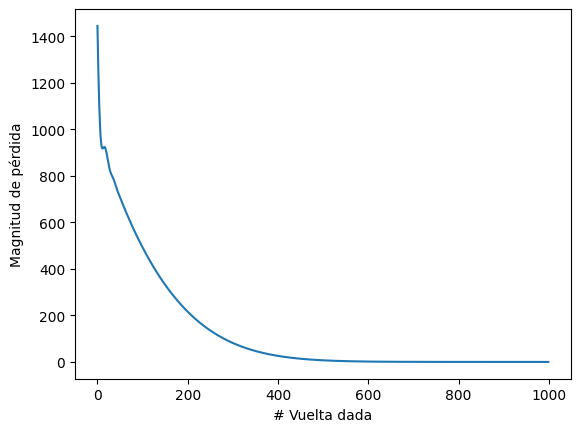

In [15]:
plt.xlabel("# Vuelta dada")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

Ahora si, estamos listos para hacer una predicción

In [16]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
El resultado es [[211.74396]] fahrenheit!


Aquí se muestran las variables que utilizó el modelo para realizar la conversión

In [17]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981412]], dtype=float32), array([31.929848], dtype=float32)]


Agregaremos más capas y más neuronas a la red

In [18]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

Volvemos a compilar el modelo ahora con las capas y neuronas agregadas recientemente

In [19]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Volvemos a entrenar el modelo una vez lo compilemos nuevamente

In [20]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


imprimimos la magnitud de pérdida

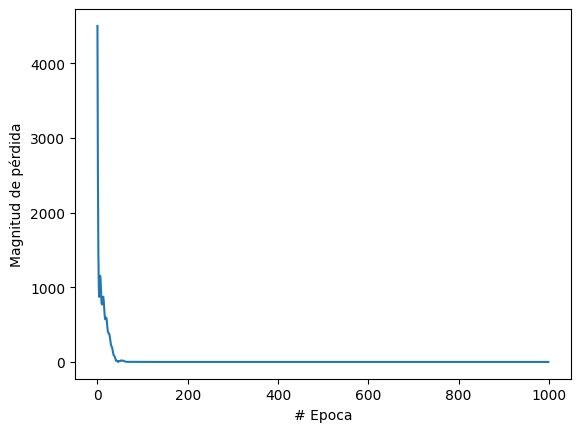

In [21]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])


Volvamos a hacer una predicción

In [22]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100.0]))
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
El resultado es [[211.74747]] fahrenheit!


Finalmente estas son las variables que utilizó el modelo para poder realizar la conversión

In [23]:
print("Variables internas del modelo")
print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[1.7981412]], dtype=float32), array([31.929848], dtype=float32)]
[array([[-0.28409883, -0.8259067 ,  0.52991855]], dtype=float32), array([ 2.8872542, -4.1654563,  1.3009897], dtype=float32)]
[array([[-0.06115919,  1.5925806 ,  0.12448952],
       [ 1.0856202 , -1.2392306 ,  0.996638  ],
       [ 0.8079465 ,  0.20567751, -0.2557323 ]], dtype=float32), array([-2.6901486,  4.2990623, -2.9175763], dtype=float32)]
[array([[-0.53924304],
       [ 1.4314334 ],
       [-0.5847779 ]], dtype=float32), array([3.90893], dtype=float32)]
